In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
DATA_FOLDER='./data/'
PATHS_AND_GRAPH = DATA_FOLDER + 'wikispeedia_paths-and-graph/'
PATHS_FINISHED = PATHS_AND_GRAPH + 'paths_finished.tsv'
PATHS_UNFINISHED = PATHS_AND_GRAPH + 'paths_unfinished.tsv'

In [5]:
#data exploration
paths_finished = pd.read_csv(PATHS_FINISHED, sep='\t', header=None, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'], encoding='utf-8', skiprows=16).copy(deep=True)
paths_finished["timestamp"] = pd.to_datetime(paths_finished["timestamp"], unit='s')
paths_finished

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,2011-02-15 03:26:49,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,2012-08-12 06:36:52,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,2012-10-03 21:10:40,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,2013-04-23 15:27:08,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,2012-10-03 02:23:35,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,2011-03-16 05:42:18,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,2013-11-22 04:42:52,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,2011-02-27 07:42:47,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0


In [6]:
import os
os.listdir('./data')

['plaintext_articles',
 'wikispeedia_articles_html.tar.gz',
 'wikispeedia_articles_plaintext.tar.gz',
 'wikispeedia_paths-and-graph',
 'wikispeedia_paths-and-graph.tar.gz',
 'wpcd']

In [7]:
paths_unfinished= pd.read_csv(PATHS_UNFINISHED, sep='\t', header=None, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'], encoding='utf-8', skiprows=17).copy(deep=True)
paths_unfinished["timestamp"] = pd.to_datetime(paths_unfinished["timestamp"], unit='s')
paths_unfinished.head()

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,2011-02-07 05:02:15,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,2011-02-07 05:14:11,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,2011-02-07 15:00:19,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,2011-02-07 16:06:01,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,2011-02-07 17:18:25,1808,Paraguay;Bolivia,Mount_St._Helens,timeout


## Find position of second link in successive pairs

In [8]:
# algo pour elever < et split paths
from tqdm import tqdm
pd.options.mode.chained_assignment = None  # Check whether this is ok !!

paths_finished_copy = paths_finished.copy()
for i in tqmd(range(len(paths_finished_copy))):
    paths_finished_copy['path'].iloc[i] = paths_finished_copy['path'].iloc[i].split(';')
    for item in paths_finished_copy['path'].iloc[i].copy():
        if (item == '<'):
            paths_finished_copy['path'].iloc[i].remove(item)

paths_finished_copy.path.iloc[10]

['14th_century',
 'Time',
 'Science',
 'Nature',
 'Weather',
 'Sunlight',
 'Sun',
 'Earth%27s_atmosphere',
 'Ultraviolet',
 'Color',
 'Light',
 'Rainbow']

In [9]:
successive_pairs = [[(x[i], x[i+1]) for i in range(len(x) - 1)] for x in paths_finished_copy['path'].to_list()]
print(len(successive_pairs))
print(successive_pairs[0])
print(successive_pairs[0][0][1])

51318
[('14th_century', '15th_century'), ('15th_century', '16th_century'), ('16th_century', 'Pacific_Ocean'), ('Pacific_Ocean', 'Atlantic_Ocean'), ('Atlantic_Ocean', 'Accra'), ('Accra', 'Africa'), ('Africa', 'Atlantic_slave_trade'), ('Atlantic_slave_trade', 'African_slave_trade')]
15th_century


In [10]:
def path_to_plaintext(article_name):
    article_name_undsc = article_name.replace(" ", "_")
    ALL_PLAINTEXT = "./data/plaintext_articles/"
    path = ALL_PLAINTEXT + article_name_undsc + ".txt"
    return path 

In [11]:
# find word count to link on html page for second element in successive_pairs in first elements html page 

In [27]:
# function version 4
def find_word_position(successive_pair):
    target_words = successive_pair[1].replace("_", " ")
    article = path_to_plaintext(successive_pair[0])

    with open(article,encoding = "utf8") as file:
        content = file.read()
        try:
            return content.index(target_words)
        except:
            #print(f"The group of words '{successive_pair[1]}' was not found in the file '{successive_pair[0]}'.")
            return 0

print(successive_pairs[3][2],'\n',find_word_position(successive_pairs[3][2]))

('Ancient_Greece', 'Greece') 
 23


In [13]:
from bs4 import BeautifulSoup

In [20]:
paths_and_len = paths_finished_copy[['path']].copy()
paths_and_len['path'] = paths_and_len['path'].apply(lambda x: len(x))
max_path_length = paths_and_len['path'].max()
max_path_length

420

In [21]:
print(len(paths_finished_copy), len(successive_pairs))

51318 51318


In [23]:
from tqdm import tqdm
# compute position for every pair in finished paths
positions_of_next_clicked_link = np.zeros((len(successive_pairs), max_path_length - 1))
for i in tqdm(range(len(successive_pairs))):
    for j in range(len(successive_pairs[i])):
        positions_of_next_clicked_link[i,j] = find_word_position(successive_pairs[i][j])
print(positions_of_next_clicked_link)

100%|██████████████████████████████████████████████████████████████████████████| 51318/51318 [00:46<00:00, 1094.91it/s]

[[  214.   214. 10681. ...     0.     0.     0.]
 [ 1090.  1106. 12629. ...     0.     0.     0.]
 [ 2328.  1644.     0. ...     0.     0.     0.]
 ...
 [  878.  5370. 17550. ...     0.     0.     0.]
 [   27. 11539.     0. ...     0.     0.     0.]
 [ 2875. 16760.     0. ...     0.     0.     0.]]


In [34]:
average_position = positions_of_next_clicked_link[np.nonzero(positions_of_next_clicked_link)].mean()
average_position

8401.920231066066

In [38]:
# average of words per seable page in wkispeedia : this will build our threshold
# (i did it with word), need to do it more rigourosly 
word_data = np.array([337, 491, 349, 323, 402, 414, 361, 425, 423, 449])
threshold = word_data.mean()
threshold

397.4

Under count 29825 
Over count 142247


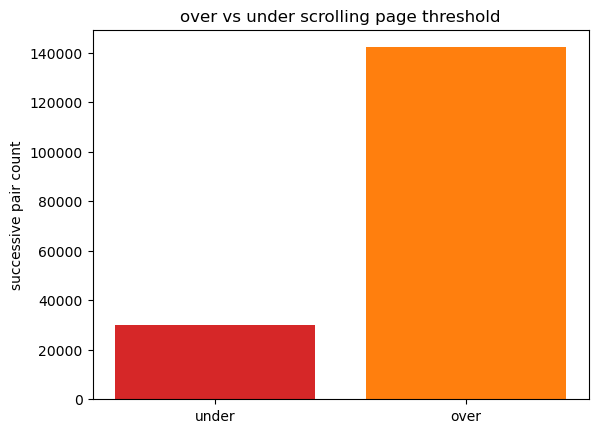

In [55]:
# compare successive pairs over or under threshold
under_threshold = np.count_nonzero(positions_of_next_clicked_link[np.nonzero(positions_of_next_clicked_link)] < threshold)
over_threshold = np.count_nonzero(positions_of_next_clicked_link[np.nonzero(positions_of_next_clicked_link)] > threshold)
print('Under count', under_threshold, '\nOver count', over_threshold)

groups = ['under', 'over']
counts = [under_threshold, over_threshold]
bar_labels = ['under', 'over']
bar_colors = ['tab:red', 'tab:orange']
plt.bar(groups, counts, label=bar_labels, color=bar_colors)
plt.ylabel('successive pair count')
plt.title('over vs under scrolling page threshold')
plt.show()

We can defenitely use this metric! \
Do not know how we could analyse it further tho... \
Conclusion can be drawn now